In [44]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pickle
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.font_manager import FontProperties
font_props = FontProperties(family='Times New Roman', size=10)

maturity = 7

In [45]:
countries= ['Belgium','Bulgaria','Czechia','Denmark','Germany', 'Estonia','Ireland','Greece',
       'Spain','France','Croatia','Italy','Cyprus','Latvia','Lithuania','Luxembourg','Hungary',
       'Netherlands','Austria','Poland','Portugal', 'Romania','Slovenia','Slovakia','Finland',
       'Sweden']

In [46]:
T0 = 2000
T1 = 2022

for filename in os.listdir("Data"):
    if filename.endswith(".csv"): 
        file_path = os.path.join("Data", filename)  
        key = filename.replace(".csv", "") 
        print(key)
        df = pd.read_csv(file_path, delimiter=';')
        if len(df.columns) < 2:
            df = pd.read_csv(file_path, delimiter=',')
        globals()[key] = df[(df.iloc[:, 0] >= T0) & (df.iloc[:, 0] <= T1)]

GDP_fix
GDP_fix_copy
Revenue
Growth
Interest_Rates
GDP_copy
Debt
Interest
Expenditure
GDP


In [47]:
Revenue = Revenue/100
Growth=Growth/100
Debt=Debt
Interest=Interest/100
Expenditure=Expenditure/100

GDP = GDP # GDP (løb) eller GDP_fix (fast)
GDP_small_sample = GDP_copy # GDP_copy (løb) eller GDP_fix_copy (fast)
# GDP = GDP_fix # GDP (løb) eller GDP_fix (fast)
# GDP_small_sample = GDP_fix_copy # GDP_copy (løb) eller GDP_fix_copy (fast)

Interest_rates = Interest_Rates

$$\begin{align*}
\texttt{tsy}_{i,t}&=\frac{\texttt{total\_gov\_revenue}_{i,t}}{\texttt{gdp}_{i,t}}\\\\
\texttt{gsy}_{i,t}&=\frac{\texttt{total\_gov\_exp}_{i,t}-\texttt{interests}_{i,t}}{\texttt{gdp}_{i,t}} \\\\
\texttt{dsy}_{i,t}&=\texttt{tsy}_{i,t}-\texttt{gsy}_{i,t}
\end{align*}$$

In [48]:
len(Interest_rates["Maturity"])
Maturity_list = Interest_rates["Maturity"]
Interest_rates.columns = range(Interest_rates.shape[1])

In [49]:
n = len(countries)
tsy = {}  
gsy = {}
dsy = {}
ismpl = {}
mt = {}

for i in range(n):
    tsy[countries[i]] = Revenue[countries[i]] 
    tsy[countries[i]].index = Revenue["Time"]

    gsy[countries[i]] = (Expenditure[countries[i]] - Interest[countries[i]])
    gsy[countries[i]].index = Revenue["Time"]

    dsy[countries[i]] = tsy[countries[i]]-gsy[countries[i]]
    dsy[countries[i]].index = Revenue["Time"]

In [50]:
# # mt = 0
# # for i in range(n):
# #     mt=mt+np.mean(tsy[countries[i]])/n
# # mt

# x = {}
# alpha = {}

# for i in range(n):
#     x[countries[i]] = np.sum((tsy[countries[i]]-gsy[countries[i]])/len(tsy[countries[i]]))
#     #print(x[countries[i]])

# # for i in range(n):
# #     alpha = np.mean(x[countries[i]])

In [51]:
Primary_Surplus = Revenue-(Expenditure-Interest)

max_1={}
average_3={}
average_5={}
max_average_3 = {}
max_average_5 = {}

for i in range(0,len(countries)):
    Primary_Surplus_x = Primary_Surplus[countries[i]]
    average_3[countries[i]]={}
    average_5[countries[i]]={}

    for j in range(0,len(Primary_Surplus)-2):
        average_3[countries[i]][j] = (Primary_Surplus_x[j]+Primary_Surplus_x[j+1]+Primary_Surplus_x[j+2])/3
    
    for j in range(0,len(Primary_Surplus)-5):
        average_5[countries[i]][j] = (Primary_Surplus_x[j]+Primary_Surplus_x[j+1]+Primary_Surplus_x[j+2]+Primary_Surplus_x[j+3]+Primary_Surplus_x[j+4])/5

for i in range(0,len(countries)):
    max_average_3[countries[i]] = max(average_3[countries[i]].values())*100
    max_average_5[countries[i]] = max(average_5[countries[i]].values())*100
    max_1[countries[i]] = max(dsy[countries[i]])*100

max_average_3_sorted = sorted(max_average_3.values(), reverse=True)
max_average_5_sorted = sorted(max_average_5.values(), reverse=True)
max_country_sorted = sorted(max_1.values(), reverse=True)

for i in range(0,len(countries)):
    max_average_3[countries[i]] = max(average_3[countries[i]].values())
    max_average_5[countries[i]] = max(average_5[countries[i]].values())
    max_1[countries[i]] = max(dsy[countries[i]])

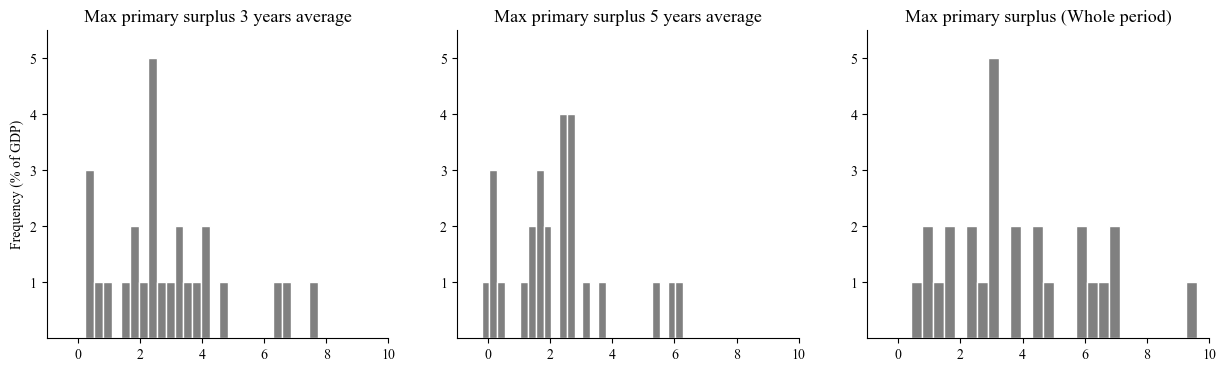

In [52]:
Histogram = [max_average_3_sorted, max_average_5_sorted, max_country_sorted]
Histogram_text = ["Max primary surplus 3 years average", "Max primary surplus 5 years average", "Max primary surplus (Whole period)"]

fig, axes = plt.subplots(1, len(Histogram), figsize=(len(Histogram)*5, 4))  # Opretter et gridlayout med et enkelt række og antallet af histogrammer som kolonner

for i, ax in enumerate(axes):  # Gennemgår alle akserne
    ax.hist(Histogram[i], bins=26, color='grey', edgecolor='white')
    if i <= 0:
        ax.set_ylabel('Frequency (% of GDP)', fontname='Times New Roman', size=10)
    
    ax.set_title(f'{Histogram_text[i]}', fontname='Times New Roman', size=13)
    ax.set_xlim(-1,10)
    ax.set_ylim(0.0001, 5.5)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    for label in ax.get_yticklabels():
        label.set_fontproperties(font_props)
    
    for label in ax.get_xticklabels():
        label.set_fontproperties(font_props)

    ax.spines[['right', 'top']].set_visible(False)

    plt.savefig("/Users/sebastianhejbergingesen/Documents/Københavns Universitet/Økonomi/2023-2025 Kandidat/8.Semester/Seminar – Topics in Sovereign Debt/Model/Plot/Plot_histogram.pdf", bbox_inches='tight', transparent=True)
    
plt.show()

$$\begin{align*}
\texttt{ALP1}_{i}&=\max_t\big(\texttt{dsy}_{i,t}\big)=\max_t\big(\texttt{tsy}_{i,t}-\texttt{gsy}_{i,t}\big)=\max_t\Bigg(\frac{\texttt{total\_gov\_revenue}_{i,t}}{\texttt{gdp}_{i,t}}-\frac{\texttt{total\_gov\_exp}_{i,t}-\texttt{interests}_{i,t}}{\texttt{gdp}_{i,t}}\Bigg)\\\\
\texttt{ALP2}_{i}&=\max_t\big(\texttt{tsy}_{i,t}\big)=\Bigg(\frac{\texttt{total\_gov\_revenue}_{i,t}}{\texttt{gdp}_{i,t}}\Bigg)\\\\
\texttt{ALP3}_{i}&=\frac{1}{t}\sum^T_{t=1}\big(\texttt{dsy}_{i,t}\big)=\frac{1}{t}\sum^T_{t=1}\big(\texttt{tsy}_{i,t}-\texttt{gsy}_{i,t}\big)=\frac{1}{t}\sum^T_{t=1} \Bigg(\frac{\texttt{total\_gov\_revenue}_{i,t}}{\texttt{gdp}_{i,t}}-\frac{\texttt{total\_gov\_exp}_{i,t}-\texttt{interests}_{i,t}}{\texttt{gdp}_{i,t}}\Bigg)
\end{align*}
$$

In [53]:
ALP1 = {}
ALP2 = {}
ALP3 = {}
ALP4 = {}
ALP5 = {}
ALP6 = {}
print_plots = False

for i in range(n):
    ALP1[countries[i]] = max(dsy[countries[i]].dropna())
    
    ALP2[countries[i]] = max(tsy[countries[i]].dropna()) - min(gsy[countries[i]].dropna())
    
    ALP3[countries[i]] = np.mean(dsy[countries[i]].dropna())
    
    ALP4[countries[i]] = dsy[countries[i]]
    
    ALP5[countries[i]] = dsy[countries[i]].dropna().quantile(0.80)
    
    cycle, trend = sm.tsa.filters.hpfilter(dsy[countries[i]].dropna(), lamb=3)

    ALP6[countries[i]] = ((trend)).rename(countries[i])

    if print_plots == True:
        plt.figure(figsize=(10, 5))
        plt.plot(ALP6[countries[i]], label='HP', marker='o')
        plt.plot(ALP4[countries[i]], label='Faktisk', marker='x')
        plt.xlabel(f'{countries[i]}')
        plt.legend()
        plt.grid(True)
        plt.show()

$$\begin{align}
\texttt{ly}_{i,t}&=\log\left(\texttt{GDP}_{i,t}\right)\\\\
\texttt{dY}_{i,t}&=\Delta \log\left(\texttt{GDP}_{i,t}\right)=\log\left(\texttt{GDP}_{i,t}\right)-\log\left(\texttt{GDP}_{i,t-1}\right)
\end{align}$$

In [54]:
ly = {}
dY = {}
MDY = {}
for i in range(n):
    ly[countries[i]] = np.log(GDP[countries[i]])
    dY[countries[i]] = ly[countries[i]].diff(1)

    MDY[countries[i]] = np.mean(dY[countries[i]])


$$\begin{align}
\texttt{dY}_t&=\rho\cdot \texttt{dY}_{t−1}+\varepsilon_t\\\\
\texttt{MDY}_{i}&=\frac{1}{n}\sum^T_{t=1} \texttt{dY}_{t,i}\\\\
\texttt{SE}_{i}&=\sqrt{\text{Var}(\hat{\rho}_i)}
\end{align}$$
 

In [55]:
ly = {}
dY = {}
for i in range(n):
    ly[countries[i]] = np.log(GDP_small_sample[countries[i]].dropna().reset_index(drop=True))
    dY[countries[i]] = ly[countries[i]].diff(1)


In [56]:

RHO = {}
SE = {}
res = {}
N   = 1000000
e = np.random.randn(maturity * N)
x = {}
x = {}
SY = {}

for i in range(n):
    model = sm.tsa.AutoReg(dY[countries[i]].dropna().reset_index(drop=True), lags=1)  
    result = model.fit()  
    res[countries[i]] = result

    RHO[countries[i]] = res[countries[i]].params.iloc[1]

    SE[countries[i]] = res[countries[i]].scale

    x[countries[i]] = np.std(res[countries[i]].resid) * e
    x[countries[i]] = np.sum(np.reshape(x[countries[i]], (maturity, N)), axis=0)
    x[countries[i]] = x[countries[i]].T

    SY[countries[i]] = np.std(x[countries[i]])


In [57]:
mt = {}
BSY = {}

for i in range(n):
    BSY[countries[i]] = Debt[countries[i]]
    #BSY[countries[i]].index = Debt["Time"]
    #BSY[countries[i]] = daty[countries[i]]


In [58]:
DY = {}
yy = {}
zz = {}

for i in range(n):
    #DY[countries[i]] = np.log(daty[countries[i]][1:]) - np.log(daty[countries[i]][:-1])
    DY[countries[i]] = np.log(GDP[countries[i]][1:].values) - np.log(GDP[countries[i]][:-1].values)
    #DY[countries[i]] = DY[countries[i]][:-1, :]

    DY[countries[i]] = DY[countries[i]].reshape(-1, 1) 
    DY[countries[i]] = DY[countries[i]][:-1, :]  

    DY[countries[i]] = [item[0] for item in DY[countries[i]]]

In [59]:
with open('variabler.pkl', 'wb') as f:
    pickle.dump([countries, maturity, Interest_rates, 
                 ALP1, ALP2, ALP3, ALP4, ALP5, ALP6,  
                 MDY, SY, RHO, SE, BSY, DY,
                 max_average_3, max_average_5, max_1], f)

In [60]:
# for i in range(0,len(Histogram)):

#     ax = plt.subplot(111)
#     ax.hist(Histogram[i], bins=26, color='grey', edgecolor='black')
#     plt.ylabel('Frequency', fontname='Times New Roman', size=14)
#     plt.title(f'{Histogram_text[i]}', fontname='Times New Roman', size=14)
#     plt.xlim(-1,)
#     plt.ylim(0,6)
#     ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#     ax.yaxis.set_major_locator(MaxNLocator(integer=True))

#     for label in ax.get_yticklabels():
#         label.set_fontproperties(font_props)
    
#     for label in ax.get_xticklabels():
#         label.set_fontproperties(font_props)

#     ax.spines[['right', 'top']].set_visible(False)
#     plt.show()
